<a href="https://colab.research.google.com/github/seymadogru/BasicDataTypes/blob/master/Art%C4%B1r%C4%B1lm%C4%B1sVeri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [3]:
pip install opencv-python-headless

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [5]:
inputBasePath = "/content/drive/MyDrive/CDD-CESM-MM"
outputBasePath = "/content/drive/MyDrive/imagearray"

In [6]:
image_width = 224
image_height = 224

In [7]:
classes = ['Benign','Malignant','Normal']

In [8]:
os.chdir(inputBasePath)

In [9]:
pwd

'/content/drive/MyDrive/CDD-CESM-MM'

In [10]:
X = []
Y = []

In [11]:
i = 0
for class1 in classes:
  os.chdir(class1)
  print('=> '+class1)
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width,image_height))
    X.append(img)
    Y.append(class1)
    i = i + 1
  os.chdir('..')

=> Benign
=> Malignant
=> Normal


In [12]:
print("X : ",len(X))
print("Y : ",len(Y))

X :  2006
Y :  2006


In [13]:
X = np.array(X).reshape(-1,image_width,image_height,3)

Y = np.array(Y)

print("X : ",X.shape)
print("Y : ",Y.shape)

print("X : ",len(X))
print("Y : ",len(Y))

X :  (2006, 224, 224, 3)
Y :  (2006,)
X :  2006
Y :  2006


In [14]:
pwd

'/content/drive/MyDrive/CDD-CESM-MM'

In [15]:
os.chdir('..')

In [16]:
pwd

'/content/drive/MyDrive'

In [17]:
os.chdir("imagearray")

In [18]:
np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

print("[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED \n ")

[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED 
 


In [19]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
utils.to_categorical

<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [20]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [21]:
data = np.load('/content/drive/MyDrive/imagearray/224x224_images.npy')
labels = np.load('/content/drive/MyDrive/imagearray/224x224_labels.npy')
data.shape

(2006, 224, 224, 3)

In [22]:
labels

array(['Benign', 'Benign', 'Benign', ..., 'Normal', 'Normal', 'Normal'],
      dtype='<U9')

In [23]:
labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [24]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [25]:
data =  data.reshape(-1,image_width , image_height , 3)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .10, shuffle = True)

In [27]:
print(
"""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}

""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (1805, 224, 224, 3)
x_test shape: (201, 224, 224, 3)
y_train shape: (1805, 3)
y_test shape: (201, 3)




In [28]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [29]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .10, shuffle = True,random_state=42)

In [30]:
print(y_train.shape)
print(y_validate.shape)

(1624, 3)
(181, 3)


In [31]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180) 10 degrees
        zoom_range = 0.1, # Randomly zoom image %10
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width) %10
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height) %10
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False  # randomly flip images
                        )
datagen.fit(x_train) #datagen'i x_train üzerinden çalıştır ve veri üret

In [33]:
from keras.applications.vgg16 import VGG16, preprocess_input
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(image_width ,image_height ,3)

)

58889256/58889256 [==============================] - 0s 0us/step


In [34]:
NUM_CLASSES=3
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.layers[0].trainable = False

In [36]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1,  factor=0.5, min_lr=0.00001)

In [38]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [39]:
epc = 100
bs = 16

In [41]:
history = model.fit_generator(datagen.flow(np.array(x_train),np.array(y_train), batch_size=bs),
                              epochs = epc, validation_data = datagen.flow(np.array(x_validate),
                             np.array(y_validate),batch_size=bs),verbose = 1,
                              steps_per_epoch=x_train.shape[0] // bs,
                              callbacks=[learning_rate_reduction])

<ipython-input-41-3e48a0840e29>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(np.array(x_train),np.array(y_train), batch_size=bs),


Epoch 1/100
101/101 [==============================] - 30s 293ms/step - loss: 1.3207 - accuracy: 0.3576 - val_loss: 1.0185 - val_accuracy: 0.4751 - lr: 1.0000e-04
Epoch 2/100
101/101 [==============================] - 26s 259ms/step - loss: 1.1969 - accuracy: 0.4123 - val_loss: 1.0152 - val_accuracy: 0.5083 - lr: 1.0000e-04
Epoch 3/100
101/101 [==============================] - 26s 260ms/step - loss: 1.1570 - accuracy: 0.4179 - val_loss: 0.9918 - val_accuracy: 0.5470 - lr: 1.0000e-04
Epoch 4/100
101/101 [==============================] - 26s 256ms/step - loss: 1.0951 - accuracy: 0.4639 - val_loss: 0.9822 - val_accuracy: 0.4972 - lr: 1.0000e-04
Epoch 5/100
101/101 [==============================] - 26s 260ms/step - loss: 1.0450 - accuracy: 0.4994 - val_loss: 0.9743 - val_accuracy: 0.5525 - lr: 1.0000e-04
Epoch 6/100
101/101 [==============================] - 27s 269ms/step - loss: 1.0238 - accuracy: 0.5236 - val_loss: 0.9881 - val_accuracy: 0.5249 - lr: 1.0000e-04
Epoch 7/100
101/101 [=

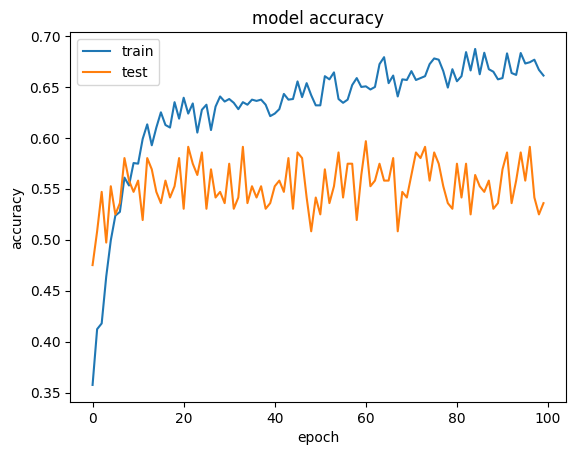

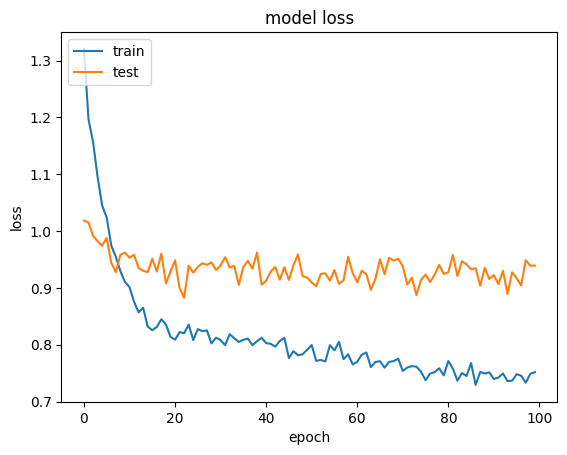

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.35      0.27      0.30        45
           1       0.77      0.69      0.73        74
           2       0.67      0.83      0.74        82

    accuracy                           0.65       201
   macro avg       0.60      0.60      0.59       201
weighted avg       0.64      0.65      0.64       201

